# Predicción en Series de Tiempo - ATM

#1. Inclusión de los Toolboxes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [3]:
import statsmodels as sm
import scipy as sp
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import optimizers
from keras.layers import Dropout
from keras.layers import LSTM

In [5]:
from datetime import datetime

#2. Lectura de los datos

In [ ]:
#from google.colab import files
#archivos = files.upload()

In [7]:
cluster0 = pd.read_csv('cluster0.csv')
cluster1 = pd.read_csv('cluster1.csv')
cluster2 = pd.read_csv('cluster2.csv')
cluster3 = pd.read_csv('cluster3.csv')
cluster4 = pd.read_csv('cluster4.csv')
print(cluster0)
print(cluster1)
print(cluster2)
print(cluster3)
print(cluster4)


     Unnamed: 0   TIMESTAMP  TERMINAL_NUMBER   MONTO_TRX
0            12  2020-09-02             9013  23905000.0
1            52  2020-09-03             9013  45840000.0
2            92  2020-09-04             9013  21770000.0
3           132  2020-09-05             9013  22132500.0
4           172  2020-09-06             9013  22495000.0
..          ...         ...              ...         ...
358       14332  2021-08-26             9013  35650000.0
359       14372  2021-08-27             9013  16900000.0
360       14412  2021-08-28             9013  16900000.0
361       14452  2021-08-29             9013  16900000.0
362       14492  2021-08-30             9013  16900000.0

[363 rows x 4 columns]
     Unnamed: 0   TIMESTAMP  TERMINAL_NUMBER   MONTO_TRX
0            30  2020-09-02             9031  15900000.0
1            70  2020-09-03             9031  28570000.0
2           110  2020-09-04             9031  29705000.0
3           150  2020-09-05             9031  39180000.0
4      

In [8]:
cluster0 = cluster0.drop(['Unnamed: 0'], axis=1)
cluster1 = cluster1.drop(['Unnamed: 0'], axis=1)
cluster2 = cluster2.drop(['Unnamed: 0'], axis=1)
cluster3 = cluster3.drop(['Unnamed: 0'], axis=1)
cluster4 = cluster4.drop(['Unnamed: 0'], axis=1)
print(cluster0)
print(cluster1)
print(cluster2)
print(cluster3)
print(cluster4)

      TIMESTAMP  TERMINAL_NUMBER   MONTO_TRX
0    2020-09-02             9013  23905000.0
1    2020-09-03             9013  45840000.0
2    2020-09-04             9013  21770000.0
3    2020-09-05             9013  22132500.0
4    2020-09-06             9013  22495000.0
..          ...              ...         ...
358  2021-08-26             9013  35650000.0
359  2021-08-27             9013  16900000.0
360  2021-08-28             9013  16900000.0
361  2021-08-29             9013  16900000.0
362  2021-08-30             9013  16900000.0

[363 rows x 3 columns]
      TIMESTAMP  TERMINAL_NUMBER   MONTO_TRX
0    2020-09-02             9031  15900000.0
1    2020-09-03             9031  28570000.0
2    2020-09-04             9031  29705000.0
3    2020-09-05             9031  39180000.0
4    2020-09-06             9031  21920000.0
..          ...              ...         ...
358  2021-08-26             9031   1810000.0
359  2021-08-27             9031   1810000.0
360  2021-08-28             903

In [9]:
dfc0 = cluster0.drop(['TERMINAL_NUMBER'], axis=1).set_index('TIMESTAMP')
dfc1 = cluster1.drop(['TERMINAL_NUMBER'], axis=1).set_index('TIMESTAMP')
dfc2 = cluster2.drop(['TERMINAL_NUMBER'], axis=1).set_index('TIMESTAMP')
dfc3 = cluster3.drop(['TERMINAL_NUMBER'], axis=1).set_index('TIMESTAMP')
dfc4 = cluster4.drop(['TERMINAL_NUMBER'], axis=1).set_index('TIMESTAMP')
print(dfc0)
print(dfc1)
print(dfc2)
print(dfc3)
print(dfc4)


             MONTO_TRX
TIMESTAMP             
2020-09-02  23905000.0
2020-09-03  45840000.0
2020-09-04  21770000.0
2020-09-05  22132500.0
2020-09-06  22495000.0
...                ...
2021-08-26  35650000.0
2021-08-27  16900000.0
2021-08-28  16900000.0
2021-08-29  16900000.0
2021-08-30  16900000.0

[363 rows x 1 columns]
             MONTO_TRX
TIMESTAMP             
2020-09-02  15900000.0
2020-09-03  28570000.0
2020-09-04  29705000.0
2020-09-05  39180000.0
2020-09-06  21920000.0
...                ...
2021-08-26   1810000.0
2021-08-27   1810000.0
2021-08-28   1810000.0
2021-08-29   1810000.0
2021-08-30   1810000.0

[363 rows x 1 columns]
             MONTO_TRX
TIMESTAMP             
2020-09-02  42150000.0
2020-09-03  84440000.0
2020-09-04  63840000.0
2020-09-05  66290000.0
2020-09-06  45450000.0
...                ...
2021-08-26  33990000.0
2021-08-27  22735000.0
2021-08-28  22735000.0
2021-08-29  22735000.0
2021-08-30  22735000.0

[363 rows x 1 columns]
             MONTO_TRX
TIMESTAM

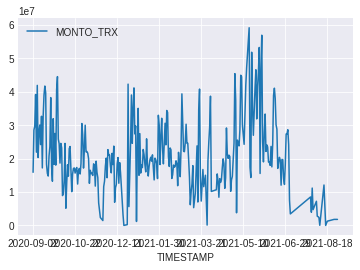

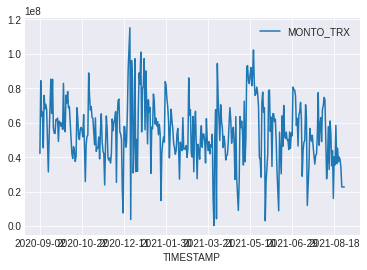

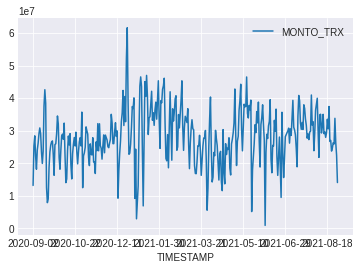

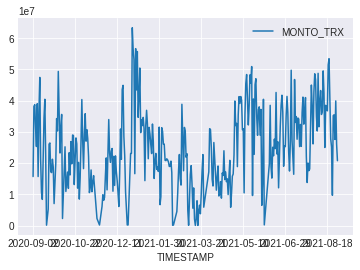

In [10]:
dfc1.plot()
dfc2.plot()
dfc3.plot()
dfc4.plot()




In [11]:
print(dfc0.min())
print(dfc1.min())
print(dfc2.min())
print(dfc3.min())
print(dfc4.min())

MONTO_TRX    50000.0
dtype: float64
MONTO_TRX    5000.0
dtype: float64
MONTO_TRX    390000.0
dtype: float64
MONTO_TRX    930000.0
dtype: float64
MONTO_TRX    55000.0
dtype: float64


#3. Métricas de Desempeño

In [12]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def e2_score(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    prom = np.mean(y_true)
    return 1 - np.sum(np.abs(y_true - y_pred)**2)/np.sum(np.abs(y_true - prom)**2)

def SEP(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    prom = np.mean(y_true)
    return 100*mean_squared_error(y_true, y_pred, squared=False)/prom

def persistence_index(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 1-np.sum((y_true[1:]-y_pred[1:])**2)/np.sum((y_true[1:]-y_true[:-1])**2)

def sMAPE(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred-y_true) / (np.abs(y_true) + np.abs(y_pred)))*100

In [13]:
def performance_results(y_real, y_predict):
    print('Mean Squared Error', mean_squared_error(y_real, y_predict) )
    print('Mean Absolute Error', mean_absolute_error(y_real, y_predict) )
    print('Root Mean Squared Error', mean_squared_error(y_real, y_predict, squared=False) )
    print('MAPE', mean_absolute_percentage_error(y_real, y_predict))
    print('sMAPE', sMAPE(y_real, y_predict))
    print('Max Error', max_error(y_real, y_predict))
    print('SEP', SEP(y_real, y_predict))
    print('Persistence Index', persistence_index(y_real, y_predict))
    print('Explained variance score', explained_variance_score(y_real, y_predict) )
    print('R2 score:',r2_score(y_real, y_predict))
    print('E2 score:',e2_score(y_real, y_predict))
    print('Spearman r:', spearmanr(y_real, y_predict)[0])
    print('Pearson r:', pearsonr(y_real.T[0], y_predict.T[0])[0])

#4. Transformación de los datos

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultc0 = seasonal_decompose(dfc0['MONTO_TRX'].values, model='additive', freq=7)
resultc1 = seasonal_decompose(dfc1['MONTO_TRX'].values, model='additive', freq=7)
resultc2 = seasonal_decompose(dfc2['MONTO_TRX'].values, model='additive', freq=7)
resultc3 = seasonal_decompose(dfc3['MONTO_TRX'].values, model='additive', freq=7)
resultc4 = seasonal_decompose(dfc4['MONTO_TRX'].values, model='additive', freq=7)


Text(0.5, 1.0, 'Cluster 4')

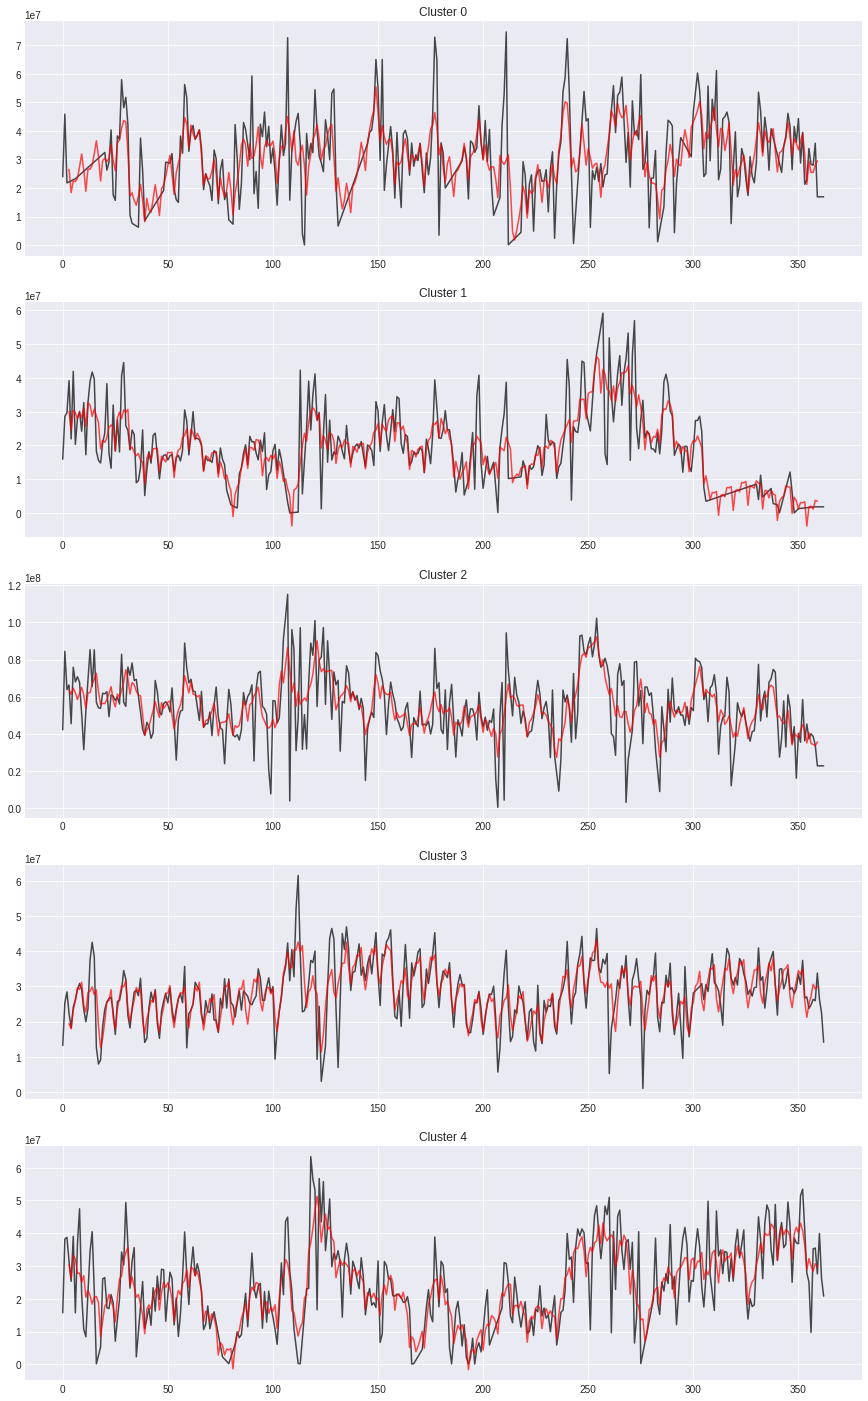

In [15]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(resultc0.observed,'-k', alpha=0.7)
atm_decompose_c0 = resultc0.trend + resultc0.seasonal
plt.plot(atm_decompose_c0,'-r', alpha=0.7)
plt.title('Cluster 0') 

plt.subplot(5,1,2);
plt.plot(resultc1.observed,'-k', alpha=0.7)
atm_decompose_c1 = resultc1.trend + resultc1.seasonal
plt.plot(atm_decompose_c1,'-r', alpha=0.7)
plt.title('Cluster 1') 

plt.subplot(5,1,3);
plt.plot(resultc2.observed,'-k', alpha=0.7)
atm_decompose_c2 = resultc2.trend + resultc2.seasonal
plt.plot(atm_decompose_c2,'-r', alpha=0.7)
plt.title('Cluster 2') 

plt.subplot(5,1,4);
plt.plot(resultc3.observed,'-k', alpha=0.7)
atm_decompose_c3 = resultc3.trend + resultc3.seasonal
plt.plot(atm_decompose_c3,'-r', alpha=0.7)
plt.title('Cluster 3') 

plt.subplot(5,1,5);
plt.plot(resultc4.observed,'-k', alpha=0.7)
atm_decompose_c4 = resultc4.trend + resultc4.seasonal
plt.plot(atm_decompose_c4,'-r', alpha=0.7)
plt.title('Cluster 4') 


In [16]:
scaler_0 = MinMaxScaler(feature_range=(0,1))
scaler_1 = MinMaxScaler(feature_range=(0,1))
scaler_2 = MinMaxScaler(feature_range=(0,1))
scaler_3 = MinMaxScaler(feature_range=(0,1))
scaler_4 = MinMaxScaler(feature_range=(0,1))

atm_ts_0 = scaler_0.fit_transform(atm_decompose_c0[7:-7].reshape(-1, 1))
atm_ts_1 = scaler_1.fit_transform(atm_decompose_c1[7:-7].reshape(-1, 1))
atm_ts_2 = scaler_2.fit_transform(atm_decompose_c2[7:-7].reshape(-1, 1))
atm_ts_3 = scaler_3.fit_transform(atm_decompose_c3[7:-7].reshape(-1, 1))
atm_ts_4 = scaler_4.fit_transform(atm_decompose_c4[7:-7].reshape(-1, 1))


###Experimento Data Observada

scaler_do_0 = MinMaxScaler(feature_range=(0,1))
scaler_do_1 = MinMaxScaler(feature_range=(0,1))
scaler_do_2 = MinMaxScaler(feature_range=(0,1))
scaler_do_3 = MinMaxScaler(feature_range=(0,1))
scaler_do_4 = MinMaxScaler(feature_range=(0,1))

atm_ts_do_0 = scaler_do_0.fit_transform(resultc0.observed.reshape(-1, 1))
atm_ts_do_1 = scaler_do_1.fit_transform(resultc1.observed.reshape(-1, 1))
atm_ts_do_2 = scaler_do_2.fit_transform(resultc2.observed.reshape(-1, 1))
atm_ts_do_3 = scaler_do_3.fit_transform(resultc3.observed.reshape(-1, 1))
atm_ts_do_4 = scaler_do_4.fit_transform(resultc4.observed.reshape(-1, 1))

###Experimento 30% Test

scaler_t2_0 = MinMaxScaler(feature_range=(0,1))
scaler_t2_1 = MinMaxScaler(feature_range=(0,1))
scaler_t2_2 = MinMaxScaler(feature_range=(0,1))
scaler_t2_3 = MinMaxScaler(feature_range=(0,1))
scaler_t2_4 = MinMaxScaler(feature_range=(0,1))

atm_ts_t2_0 = scaler_t2_0.fit_transform(atm_decompose_c0[7:-7].reshape(-1, 1))
atm_ts_t2_1 = scaler_t2_1.fit_transform(atm_decompose_c1[7:-7].reshape(-1, 1))
atm_ts_t2_2 = scaler_t2_2.fit_transform(atm_decompose_c2[7:-7].reshape(-1, 1))
atm_ts_t2_3 = scaler_t2_3.fit_transform(atm_decompose_c3[7:-7].reshape(-1, 1))
atm_ts_t2_4 = scaler_t2_4.fit_transform(atm_decompose_c4[7:-7].reshape(-1, 1))

In [17]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
lags = 8
X_0, y_0 = create_dataset(atm_ts_0.reshape(-1,1), look_back=lags)
X_1, y_1 = create_dataset(atm_ts_1.reshape(-1,1), look_back=lags)
X_2, y_2 = create_dataset(atm_ts_2.reshape(-1,1), look_back=lags)
X_3, y_3 = create_dataset(atm_ts_3.reshape(-1,1), look_back=lags)
X_4, y_4 = create_dataset(atm_ts_4.reshape(-1,1), look_back=lags)

###Experimento Data Observada

X_do_0, y_do_0 = create_dataset(atm_ts_do_0.reshape(-1,1), look_back=lags)
X_do_1, y_do_1 = create_dataset(atm_ts_do_1.reshape(-1,1), look_back=lags)
X_do_2, y_do_2 = create_dataset(atm_ts_do_2.reshape(-1,1), look_back=lags)
X_do_3, y_do_3 = create_dataset(atm_ts_do_3.reshape(-1,1), look_back=lags)
X_do_4, y_do_4 = create_dataset(atm_ts_do_4.reshape(-1,1), look_back=lags)


###Experimiento 30% test

X_t2_0, y_t2_0 = create_dataset(atm_ts_t2_0.reshape(-1,1), look_back=lags)
X_t2_1, y_t2_1 = create_dataset(atm_ts_t2_1.reshape(-1,1), look_back=lags)
X_t2_2, y_t2_2 = create_dataset(atm_ts_t2_2.reshape(-1,1), look_back=lags)
X_t2_3, y_t2_3 = create_dataset(atm_ts_t2_3.reshape(-1,1), look_back=lags)
X_t2_4, y_t2_4 = create_dataset(atm_ts_t2_4.reshape(-1,1), look_back=lags)

#5. Separación en conjunto de Entrenamiento-Test

In [19]:
n_test = 60
n_test2 = 110

#Cluster 0
n_data_0 =len(y_0)
n_train_0 = n_data_0-n_test
X_train_0 = X_0[:n_train_0,:]
y_train_0 = y_0[:n_train_0]
X_test_0 = X_0[n_train_0:]
y_test_0 = y_0[n_train_0:]

#Cluster 1
n_data_1 =len(y_1)
n_train_1 = n_data_1-n_test
X_train_1 = X_1[:n_train_1,:]
y_train_1 = y_1[:n_train_1]
X_test_1 = X_1[n_train_1:]
y_test_1 = y_1[n_train_1:]

#Cluster 2
n_data_2 =len(y_2)
n_train_2 = n_data_2-n_test
X_train_2 = X_2[:n_train_2,:]
y_train_2 = y_2[:n_train_2]
X_test_2 = X_2[n_train_2:]
y_test_2 = y_2[n_train_2:]

#Cluster 3
n_data_3 =len(y_3)
n_train_3 = n_data_3-n_test
X_train_3 = X_3[:n_train_3,:]
y_train_3 = y_3[:n_train_3]
X_test_3 = X_3[n_train_3:]
y_test_3 = y_3[n_train_3:]

#Cluster 4
n_data_4 =len(y_4)
n_train_4 = n_data_4-n_test
X_train_4 = X_4[:n_train_4,:]
y_train_4 = y_4[:n_train_4]
X_test_4 = X_4[n_train_4:]
y_test_4 = y_4[n_train_4:]

###Experimento Data Observada

#Cluster 0
n_data_do_0 =len(y_do_0)
n_train_do_0 = n_data_do_0-n_test
X_train_do_0 = X_do_0[:n_train_do_0,:]
y_train_do_0 = y_do_0[:n_train_do_0]
X_test_do_0 = X_do_0[n_train_do_0:]
y_test_do_0 = y_do_0[n_train_do_0:]

#Cluster 1
n_data_do_1 =len(y_do_1)
n_train_do_1 = n_data_do_1-n_test
X_train_do_1 = X_do_1[:n_train_do_1,:]
y_train_do_1 = y_do_1[:n_train_do_1]
X_test_do_1 = X_do_1[n_train_do_1:]
y_test_do_1 = y_do_1[n_train_do_1:]

#Cluster 2
n_data_do_2 =len(y_do_2)
n_train_do_2 = n_data_do_2-n_test
X_train_do_2 = X_do_2[:n_train_do_2,:]
y_train_do_2 = y_do_2[:n_train_do_2]
X_test_do_2 = X_do_2[n_train_do_2:]
y_test_do_2 = y_do_2[n_train_do_2:]

#Cluster 3
n_data_do_3 =len(y_do_3)
n_train_do_3 = n_data_do_3-n_test
X_train_do_3 = X_do_3[:n_train_do_3,:]
y_train_do_3 = y_do_3[:n_train_do_3]
X_test_do_3 = X_do_3[n_train_do_3:]
y_test_do_3 = y_do_3[n_train_do_3:]

#Cluster 4
n_data_do_4 =len(y_do_4)
n_train_do_4 = n_data_do_4-n_test
X_train_do_4 = X_do_4[:n_train_do_4,:]
y_train_do_4 = y_do_4[:n_train_do_4]
X_test_do_4 = X_do_4[n_train_do_4:]
y_test_do_4 = y_do_4[n_train_do_4:]

###Experimento 30% de test

#Cluster 0
n_data_t2_0 =len(y_0)
n_train_t2_0 = n_data_t2_0-n_test2
X_train_t2_0 = X_t2_0[:n_train_t2_0,:]
y_train_t2_0 = y_t2_0[:n_train_t2_0]
X_test_t2_0 = X_t2_0[n_train_t2_0:]
y_test_t2_0 = y_t2_0[n_train_t2_0:]

#Cluster 1
n_data_t2_1 =len(y_1)
n_train_t2_1 = n_data_t2_1-n_test2
X_train_t2_1 = X_t2_1[:n_train_t2_1,:]
y_train_t2_1 = y_t2_1[:n_train_t2_1]
X_test_t2_1 = X_t2_1[n_train_t2_1:]
y_test_t2_1 = y_t2_1[n_train_t2_1:]

#Cluster 2
n_data_t2_2 =len(y_2)
n_train_t2_2 = n_data_t2_2-n_test2
X_train_t2_2 = X_t2_2[:n_train_t2_2,:]
y_train_t2_2 = y_t2_2[:n_train_t2_2]
X_test_t2_2 = X_t2_2[n_train_t2_2:]
y_test_t2_2 = y_t2_2[n_train_t2_2:]

#Cluster 3
n_data_t2_3 =len(y_3)
n_train_t2_3 = n_data_t2_3-n_test2
X_train_t2_3 = X_t2_3[:n_train_t2_3,:]
y_train_t2_3 = y_t2_3[:n_train_t2_3]
X_test_t2_3 = X_t2_3[n_train_t2_3:]
y_test_t2_3 = y_t2_3[n_train_t2_3:]

#Cluster 4
n_data_t2_4 =len(y_4)
n_train_t2_4 = n_data_t2_4-n_test2
X_train_t2_4 = X_t2_4[:n_train_t2_4,:]
y_train_t2_4 = y_t2_4[:n_train_t2_4]
X_test_t2_4 = X_t2_4[n_train_t2_4:]
y_test_t2_4 = y_t2_4[n_train_t2_4:]

Text(0.5, 1.0, 'Cluster 4')

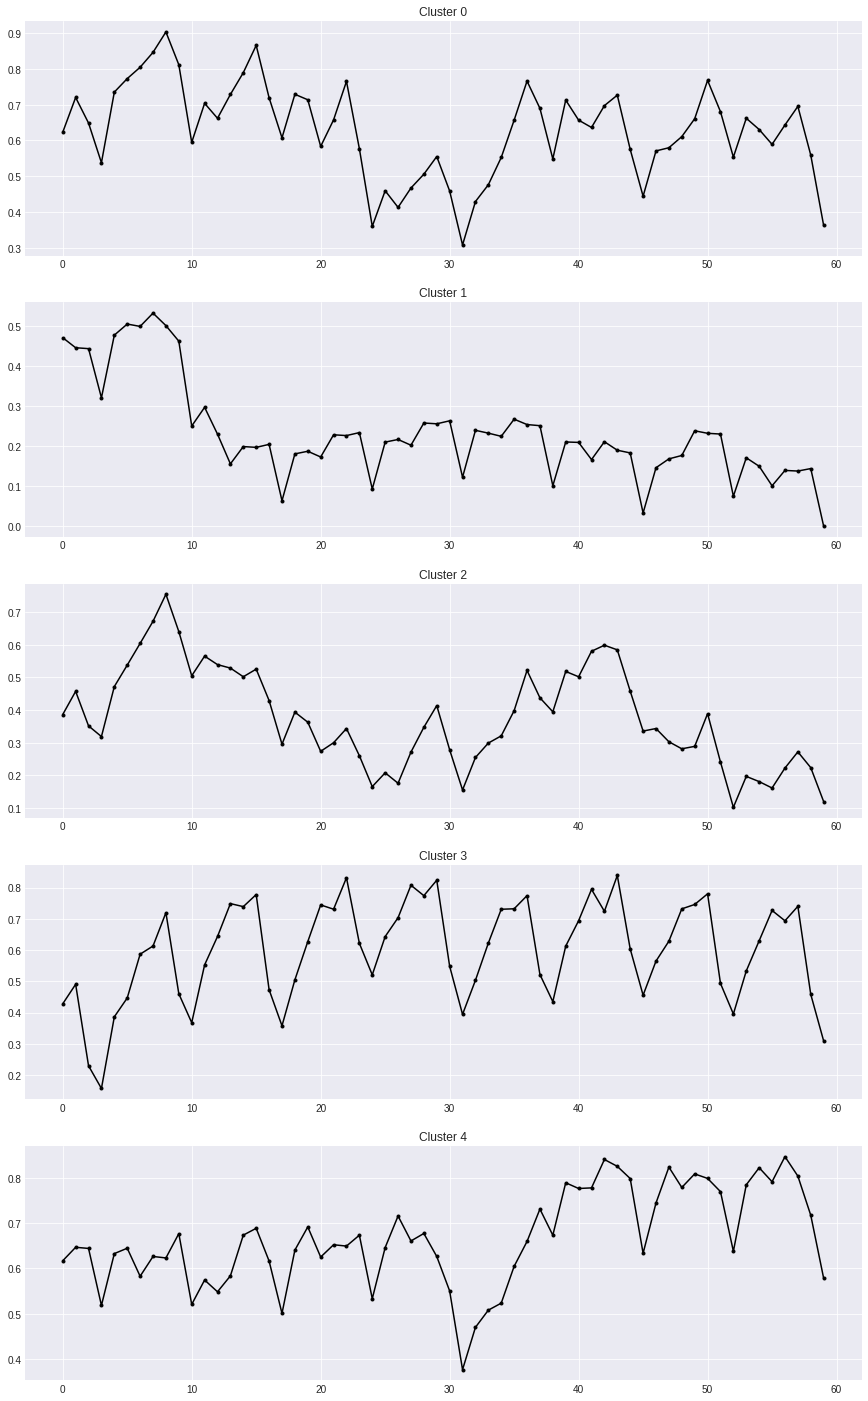

In [20]:
### Demanda de dinero con función decompuesta

plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(y_test_0,'.-k')
plt.title('Cluster 0')

plt.subplot(5,1,2);
plt.plot(y_test_1,'.-k')
plt.title('Cluster 1')

plt.subplot(5,1,3);
plt.plot(y_test_2,'.-k')
plt.title('Cluster 2')

plt.subplot(5,1,4);
plt.plot(y_test_3,'.-k')
plt.title('Cluster 3')

plt.subplot(5,1,5);
plt.plot(y_test_4,'.-k')
plt.title('Cluster 4')



 


Text(0.5, 1.0, 'Cluster 4')

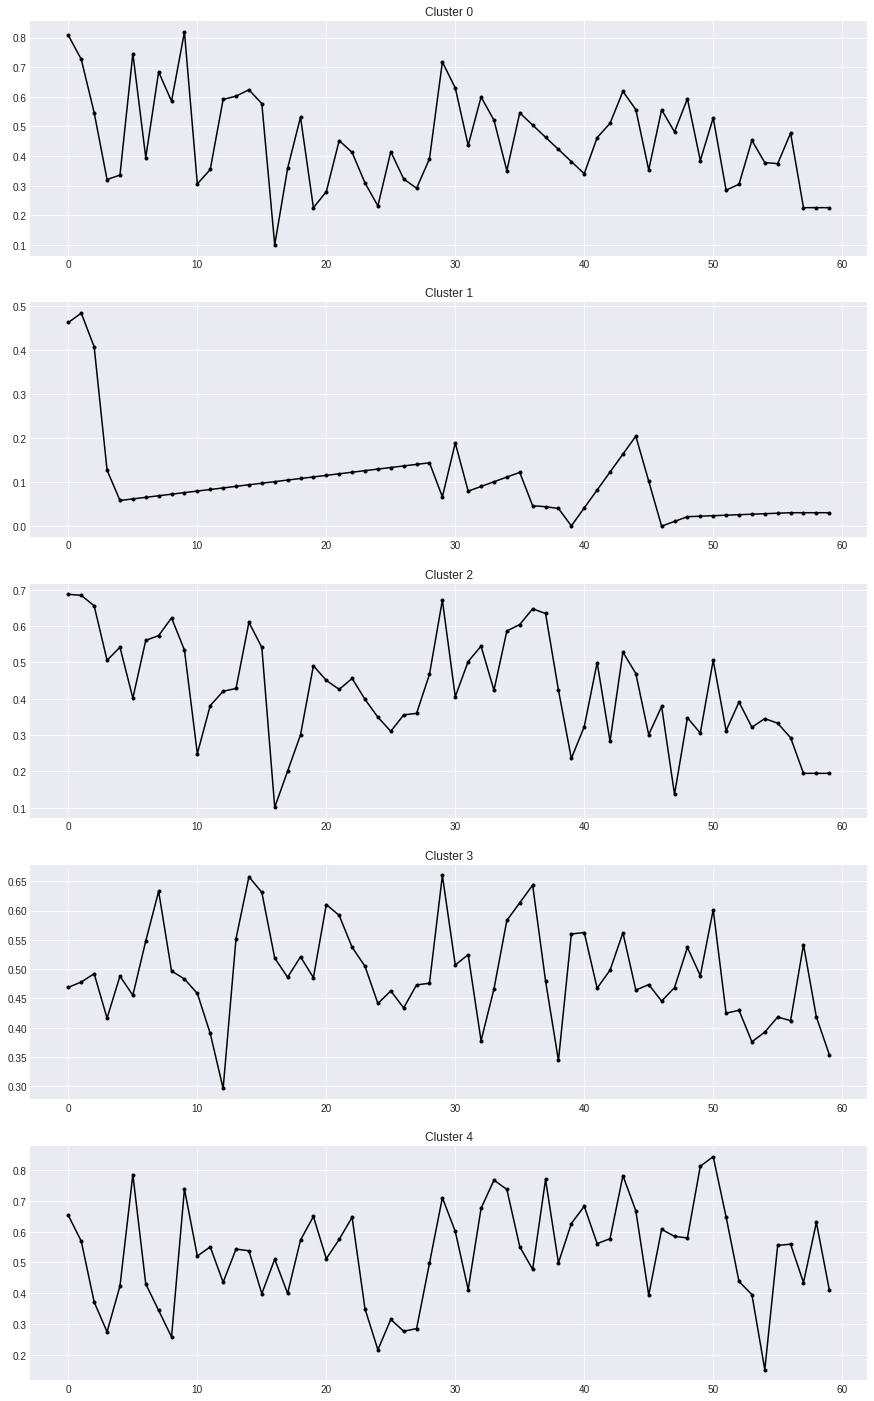

In [21]:
### Demanda de dinero sin función decompuesta

plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(y_test_do_0,'.-k')
plt.title('Cluster 0')

plt.subplot(5,1,2);
plt.plot(y_test_do_1,'.-k')
plt.title('Cluster 1')

plt.subplot(5,1,3);
plt.plot(y_test_do_2,'.-k')
plt.title('Cluster 2')

plt.subplot(5,1,4);
plt.plot(y_test_do_3,'.-k')
plt.title('Cluster 3')

plt.subplot(5,1,5);
plt.plot(y_test_do_4,'.-k')
plt.title('Cluster 4')

Text(0.5, 1.0, 'Cluster 4')

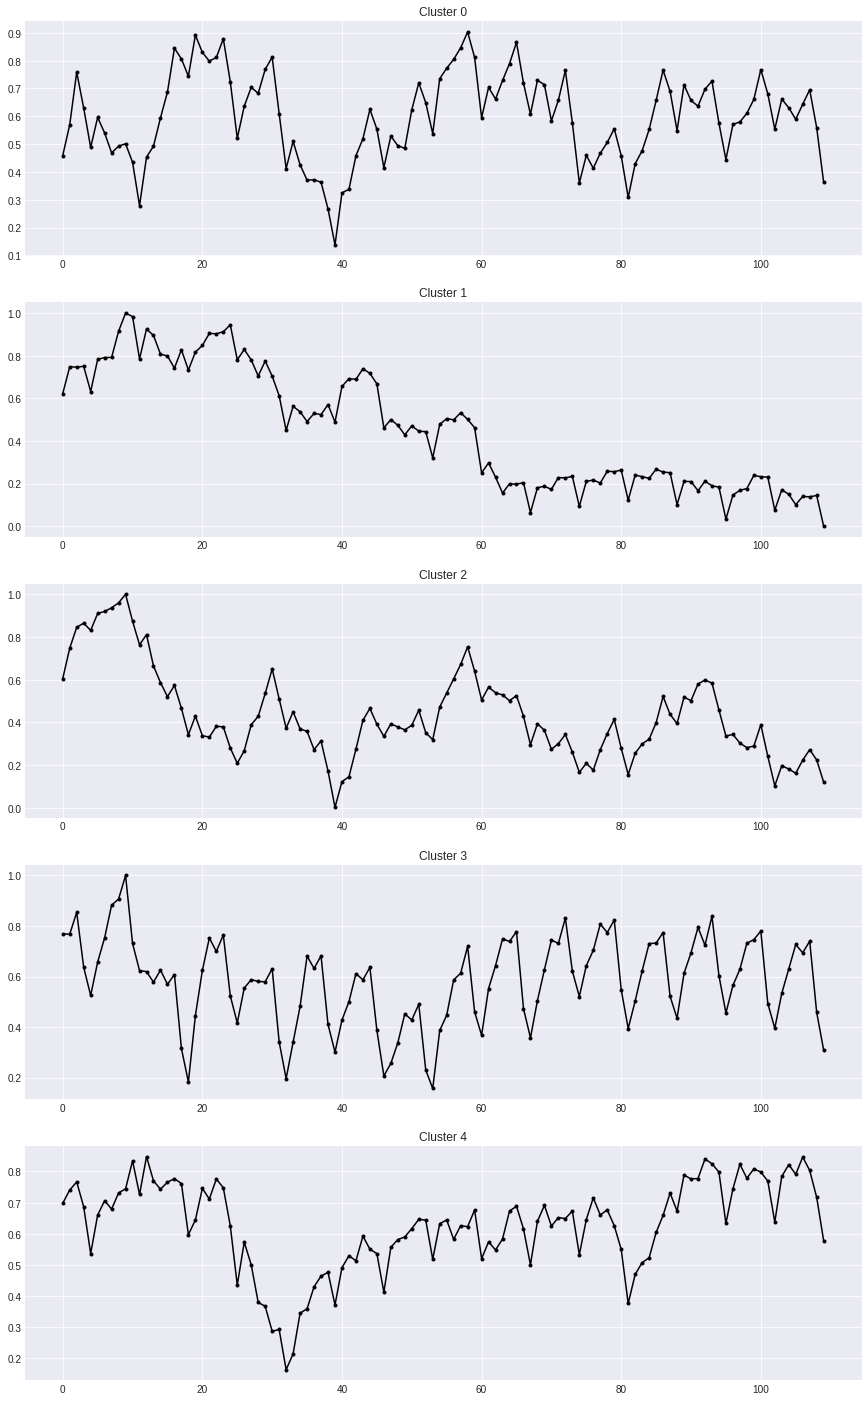

In [22]:
### Demanda de dinero con función decompuesta y 30% de data para test

plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(y_test_t2_0,'.-k')
plt.title('Cluster 0')

plt.subplot(5,1,2);
plt.plot(y_test_t2_1,'.-k')
plt.title('Cluster 1')

plt.subplot(5,1,3);
plt.plot(y_test_t2_2,'.-k')
plt.title('Cluster 2')

plt.subplot(5,1,4);
plt.plot(y_test_t2_3,'.-k')
plt.title('Cluster 3')

plt.subplot(5,1,5);
plt.plot(y_test_t2_4,'.-k')
plt.title('Cluster 4')

#6. MLP

In [23]:
def create_MLP_model(neurons = 7):
    model = Sequential()
    model.add(Dense(int(neurons*2), input_dim=neurons, activation='sigmoid'))  
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [24]:
mlp_model_0 = create_MLP_model(lags)
mlp_model_1 = create_MLP_model(lags)
mlp_model_2 = create_MLP_model(lags)
mlp_model_3 = create_MLP_model(lags)
mlp_model_4 = create_MLP_model(lags)
print(mlp_model_0.summary())

###Experimento Data Observada

mlp_model_do_0 = create_MLP_model(lags)
mlp_model_do_1 = create_MLP_model(lags)
mlp_model_do_2 = create_MLP_model(lags)
mlp_model_do_3 = create_MLP_model(lags)
mlp_model_do_4 = create_MLP_model(lags)

###Experimento 30% Test

mlp_model_t2_0 = create_MLP_model(lags)
mlp_model_t2_1 = create_MLP_model(lags)
mlp_model_t2_2 = create_MLP_model(lags)
mlp_model_t2_3 = create_MLP_model(lags)
mlp_model_t2_4 = create_MLP_model(lags)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
mlp_model_0.fit(X_train_0, y_train_0, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_1.fit(X_train_1, y_train_1, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_2.fit(X_train_2, y_train_2, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_3.fit(X_train_3, y_train_3, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_4.fit(X_train_4, y_train_4, epochs=5000, batch_size=16,  shuffle=False, verbose=0)


###Experimento Data Observada
mlp_model_do_0.fit(X_train_do_0, y_train_do_0, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_do_1.fit(X_train_do_1, y_train_do_1, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_do_2.fit(X_train_do_2, y_train_do_2, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_do_3.fit(X_train_do_3, y_train_do_3, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_do_4.fit(X_train_do_4, y_train_do_4, epochs=5000, batch_size=16,  shuffle=False, verbose=0)

###Experimento 30% Test
mlp_model_t2_0.fit(X_train_t2_0, y_train_t2_0, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_t2_1.fit(X_train_t2_1, y_train_t2_1, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_t2_2.fit(X_train_t2_2, y_train_t2_2, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_t2_3.fit(X_train_t2_3, y_train_t2_3, epochs=5000, batch_size=16,  shuffle=False, verbose=0)
mlp_model_t2_4.fit(X_train_t2_4, y_train_t2_4, epochs=5000, batch_size=16,  shuffle=False, verbose=0)

KeyboardInterrupt: ignored

In [ ]:
y_predict_0 = mlp_model_0.predict(X_test_0)
y_pred_0 = scaler_0.inverse_transform(y_predict_0)
y_target_0 = scaler_0.inverse_transform(y_test_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_0,y_pred_0)

y_predict_1 = mlp_model_1.predict(X_test_1)
y_pred_1 = scaler_1.inverse_transform(y_predict_1)
y_target_1 = scaler_1.inverse_transform(y_test_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_1,y_pred_1)

y_predict_2 = mlp_model_2.predict(X_test_2)
y_pred_2 = scaler_2.inverse_transform(y_predict_2)
y_target_2 = scaler_2.inverse_transform(y_test_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_2,y_pred_2)

y_predict_3 = mlp_model_3.predict(X_test_3)
y_pred_3 = scaler_3.inverse_transform(y_predict_3)
y_target_3 = scaler_3.inverse_transform(y_test_3.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_3,y_pred_3)

y_predict_4 = mlp_model_4.predict(X_test_4)
y_pred_4 = scaler_4.inverse_transform(y_predict_4)
y_target_4 = scaler_4.inverse_transform(y_test_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_4,y_pred_4)

print('\n\n\n*********************RESULTADOS DATA 30% TEST************************\n\n\n')


y_predict_t2_0 = mlp_model_t2_0.predict(X_test_t2_0)
y_pred_t2_0 = scaler_t2_0.inverse_transform(y_predict_t2_0)
y_target_t2_0 = scaler_t2_0.inverse_transform(y_test_t2_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_t2_0,y_pred_t2_0)

y_predict_t2_1 = mlp_model_t2_1.predict(X_test_t2_1)
y_pred_t2_1 = scaler_t2_1.inverse_transform(y_predict_t2_1)
y_target_t2_1 = scaler_t2_1.inverse_transform(y_test_t2_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_t2_1,y_pred_t2_1)

y_predict_t2_2 = mlp_model_t2_2.predict(X_test_t2_2)
y_pred_t2_2 = scaler_t2_2.inverse_transform(y_predict_t2_2)
y_target_t2_2 = scaler_t2_2.inverse_transform(y_test_t2_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_t2_2,y_pred_t2_2)

y_predict_t2_3 = mlp_model_t2_3.predict(X_test_t2_3)
y_pred_t2_3 = scaler_t2_3.inverse_transform(y_predict_t2_3)
y_target_t2_3 = scaler_t2_3.inverse_transform(y_test_t2_3.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_t2_3,y_pred_t2_3)

y_predict_t2_4 = mlp_model_t2_4.predict(X_test_t2_4)
y_pred_t2_4 = scaler_t2_4.inverse_transform(y_predict_t2_4)
y_target_t2_4 = scaler_t2_4.inverse_transform(y_test_t2_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_t2_4,y_pred_t2_4)

print('\n\n\n*********************RESULTADOS CON DATA OBSERVADA************************\n\n\n')


y_predict_do_0 = mlp_model_do_0.predict(X_test_do_0)
y_pred_do_0 = scaler_do_0.inverse_transform(y_predict_do_0)
y_target_do_0 = scaler_do_0.inverse_transform(y_test_do_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_do_0,y_pred_do_0)

y_predict_do_1 = mlp_model_do_1.predict(X_test_do_1)
y_pred_do_1 = scaler_do_1.inverse_transform(y_predict_do_1)
y_target_do_1 = scaler_do_1.inverse_transform(y_test_do_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_do_1,y_pred_do_1)

y_predict_do_2 = mlp_model_do_2.predict(X_test_do_2)
y_pred_do_2 = scaler_do_2.inverse_transform(y_predict_do_2)
y_target_do_2 = scaler_do_2.inverse_transform(y_test_do_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_do_2,y_pred_do_2)

y_predict_do_3 = mlp_model_do_3.predict(X_test_do_3)
y_pred_do_3 = scaler_do_3.inverse_transform(y_predict_do_3)
y_target_do_3 = scaler_do_3.inverse_transform(y_test_do_3.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_do_3,y_pred_do_3)

y_predict_do_4 = mlp_model_do_4.predict(X_test_do_4)
y_pred_do_4 = scaler_do_4.inverse_transform(y_predict_do_4)
y_target_do_4 = scaler_do_4.inverse_transform(y_test_do_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_do_4,y_pred_do_4)


In [ ]:

print('Gráficas de correlación predicción vs data observada - USANDO DATA DECOMPUESTA')
plt.figure(figsize=(15,5))

plt.subplot(2,3,1);
plt.plot(y_target_0,y_pred_0,'.')
plt.title('Vector de disperción MLP Cluster 0')

plt.subplot(2,3,2);
plt.plot(y_target_1,y_pred_1,'.')
plt.title('Vector de disperción MLP Cluster 1')

plt.subplot(2,3,3);
plt.plot(y_target_2,y_pred_2,'.')
plt.title('Vector de disperción MLP Cluster 2')

plt.subplot(2,3,4);
plt.plot(y_target_3,y_pred_3,'.')
plt.title('Vector de disperción MLP Cluster 3')

plt.subplot(2,3,5);
plt.plot(y_target_4,y_pred_4,'.')
plt.title('Vector de disperción MLP Cluster 4')






In [ ]:
print('Gráficas de correlación predicción vs data observada - USANDO 30 % TEST DATA DECOMPUESTA')
plt.figure(figsize=(15,5))

plt.subplot(2,3,1);
plt.plot(y_target_t2_0,y_pred_t2_0,'.')
plt.title('Vector de disperción MLP Cluster 0')

plt.subplot(2,3,2);
plt.plot(y_target_t2_1,y_pred_t2_1,'.')
plt.title('Vector de disperción MLP Cluster 1')

plt.subplot(2,3,3);
plt.plot(y_target_t2_2,y_pred_t2_2,'.')
plt.title('Vector de disperción MLP Cluster 2')

plt.subplot(2,3,4);
plt.plot(y_target_t2_3,y_pred_t2_3,'.')
plt.title('Vector de disperción MLP Cluster 3')

plt.subplot(2,3,5);
plt.plot(y_target_t2_4,y_pred_t2_4,'.')
plt.title('Vector de disperción MLP Cluster 4')

In [ ]:
print('Gráficas de correlación predicción vs data observada - USANDO DATA DECOMPUESTA')
plt.figure(figsize=(15,5))


plt.subplot(2,3,1);
plt.plot(y_target_do_0,y_pred_do_0,'.')
plt.title('Vector de disperción MLP Cluster 0')

plt.subplot(2,3,2);
plt.plot(y_target_do_1,y_pred_do_1,'.')
plt.title('Vector de disperción MLP Cluster 1')

plt.subplot(2,3,3);
plt.plot(y_target_do_2,y_pred_do_2,'.')
plt.title('Vector de disperción MLP Cluster 2')

plt.subplot(2,3,4);
plt.plot(y_target_do_3,y_pred_do_3,'.')
plt.title('Vector de disperción MLP Cluster 3')

plt.subplot(2,3,5);
plt.plot(y_target_do_4,y_pred_do_4,'.')
plt.title('Vector de disperción MLP Cluster 4')

In [ ]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(resultc0.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_0,'.-k', label='Decomposed')
plt.plot(y_pred_0,'.-r', label='Predicted')
plt.title('Comparativa Predicción MLP Cluster 0')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,2);
plt.plot(resultc1.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_1,'.-k', label='Decomposed')
plt.plot(y_pred_1,'.-r', label='Predicted')
plt.title('Comparativa Predicción MLP Cluster 1')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,3);
plt.plot(resultc2.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_2,'.-k', label='Decomposed')
plt.plot(y_pred_2,'.-r', label='Predicted')
plt.title('Comparativa Predicción MLP Cluster 2')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,4);
plt.plot(resultc3.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_3,'.-k', label='Decomposed')
plt.plot(y_pred_3,'.-r', label='Predicted')
plt.title('Comparativa Predicción MLP Cluster 3')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,5);
plt.plot(resultc4.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_4,'.-k', label='Decomposed')
plt.plot(y_pred_4,'.-r', label='Predicted')
plt.title('Comparativa Predicción MLP Cluster 4')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])



In [ ]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(resultc0.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_0,'.-k', label='Decomposed')
plt.plot(y_pred_t2_0,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción MLP Cluster 0')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,2);
plt.plot(resultc1.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_1,'.-k', label='Decomposed')
plt.plot(y_pred_t2_1,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción MLP Cluster 1')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,3);
plt.plot(resultc2.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_2,'.-k', label='Decomposed')
plt.plot(y_pred_t2_2,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción MLP Cluster 2')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,4);
plt.plot(resultc3.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_3,'.-k', label='Decomposed')
plt.plot(y_pred_t2_3,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción MLP Cluster 3')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,5);
plt.plot(resultc4.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_4,'.-k', label='Decomposed')
plt.plot(y_pred_t2_4,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción MLP Cluster 4')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

In [ ]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(resultc0.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_0,'.-k', label='Decomposed')
plt.plot(y_pred_do_0,'.-r', label='Predicted - Data Observada')
plt.title('Comparativa Predicción MLP Cluster 0')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - Data Observada'])

plt.subplot(5,1,2);
plt.plot(resultc1.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_1,'.-k', label='Decomposed')
plt.plot(y_pred_do_1,'.-r', label='Predicted - Data Observada')
plt.title('Comparativa Predicción MLP Cluster 1')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - Data Observada'])

plt.subplot(5,1,3);
plt.plot(resultc2.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_2,'.-k', label='Decomposed')
plt.plot(y_pred_do_2,'.-r', label='Predicted - Data Observada')
plt.title('Comparativa Predicción MLP Cluster 2')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - Data Observada'])

plt.subplot(5,1,4);
plt.plot(resultc3.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_3,'.-k', label='Decomposed')
plt.plot(y_pred_do_3,'.-r', label='Predicted - Data Observada')
plt.title('Comparativa Predicción MLP Cluster 3')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - Data Observada'])

plt.subplot(5,1,5);
plt.plot(resultc4.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_4,'.-k', label='Decomposed')
plt.plot(y_pred_do_4,'.-r', label='Predicted - Data Observada')
plt.title('Comparativa Predicción MLP Cluster 4')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - Data Observada'])

#7. LSTM

In [29]:
def create_LSTM_model(neurons = 7, look_back = 1):
    model = Sequential()
    model.add(LSTM(int(neurons*2), input_shape = (1, look_back)))
    model.add(Dropout(0.25))
    model.add(Dense(1,activation='linear'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [30]:
#Variables de entrenamiento y de test usando función de decompose

trainX_0 = np.reshape(X_train_0, (X_train_0.shape[0], 1, X_train_0.shape[1]))
testX_0 = np.reshape(X_test_0, (X_test_0.shape[0], 1, X_test_0.shape[1]))

trainX_1 = np.reshape(X_train_1, (X_train_1.shape[0], 1, X_train_1.shape[1]))
testX_1 = np.reshape(X_test_1, (X_test_1.shape[0], 1, X_test_1.shape[1]))

trainX_2 = np.reshape(X_train_2, (X_train_2.shape[0], 1, X_train_2.shape[1]))
testX_2 = np.reshape(X_test_2, (X_test_2.shape[0], 1, X_test_2.shape[1]))

trainX_3 = np.reshape(X_train_3, (X_train_3.shape[0], 1, X_train_3.shape[1]))
testX_3 = np.reshape(X_test_3, (X_test_3.shape[0], 1, X_test_3.shape[1]))

trainX_4 = np.reshape(X_train_4, (X_train_4.shape[0], 1, X_train_4.shape[1]))
testX_4 = np.reshape(X_test_4, (X_test_4.shape[0], 1, X_test_4.shape[1]))


#Variables de entrenamiento y de test usando el 30% de test

trainX_t2_0 = np.reshape(X_train_t2_0, (X_train_t2_0.shape[0], 1, X_train_t2_0.shape[1]))
testX_t2_0 = np.reshape(X_test_t2_0, (X_test_t2_0.shape[0], 1, X_test_t2_0.shape[1]))

trainX_t2_1 = np.reshape(X_train_t2_1, (X_train_t2_1.shape[0], 1, X_train_t2_1.shape[1]))
testX_t2_1 = np.reshape(X_test_t2_1, (X_test_t2_1.shape[0], 1, X_test_t2_1.shape[1]))

trainX_t2_2 = np.reshape(X_train_t2_2, (X_train_t2_2.shape[0], 1, X_train_t2_2.shape[1]))
testX_t2_2 = np.reshape(X_test_t2_2, (X_test_t2_2.shape[0], 1, X_test_t2_2.shape[1]))

trainX_t2_3 = np.reshape(X_train_t2_3, (X_train_t2_3.shape[0], 1, X_train_t2_3.shape[1]))
testX_t2_3 = np.reshape(X_test_t2_3, (X_test_t2_3.shape[0], 1, X_test_t2_3.shape[1]))

trainX_t2_4 = np.reshape(X_train_t2_4, (X_train_t2_4.shape[0], 1, X_train_t2_4.shape[1]))
testX_t2_4 = np.reshape(X_test_t2_4, (X_test_t2_4.shape[0], 1, X_test_t2_4.shape[1]))



#Variables de entrenamiento y de test sin usar la función de decompose

trainX_do_0 = np.reshape(X_train_do_0, (X_train_do_0.shape[0], 1, X_train_do_0.shape[1]))
testX_do_0 = np.reshape(X_test_do_0, (X_test_do_0.shape[0], 1, X_test_do_0.shape[1]))

trainX_do_1 = np.reshape(X_train_do_1, (X_train_do_1.shape[0], 1, X_train_do_1.shape[1]))
testX_do_1 = np.reshape(X_test_do_1, (X_test_do_1.shape[0], 1, X_test_do_1.shape[1]))

trainX_do_2 = np.reshape(X_train_do_2, (X_train_do_2.shape[0], 1, X_train_do_2.shape[1]))
testX_do_2 = np.reshape(X_test_do_2, (X_test_do_2.shape[0], 1, X_test_do_2.shape[1]))

trainX_do_3 = np.reshape(X_train_do_3, (X_train_do_3.shape[0], 1, X_train_do_3.shape[1]))
testX_do_3 = np.reshape(X_test_do_3, (X_test_do_3.shape[0], 1, X_test_do_3.shape[1]))

trainX_do_4 = np.reshape(X_train_do_4, (X_train_do_4.shape[0], 1, X_train_do_4.shape[1]))
testX_do_4 = np.reshape(X_test_do_4, (X_test_do_4.shape[0], 1, X_test_do_4.shape[1]))

In [31]:
#Entrenamiento de modelo usando decompose

lstm_model_0 = create_LSTM_model(20,lags)
lstm_model_0.fit(trainX_0, y_train_0, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_1 = create_LSTM_model(20,lags)
lstm_model_1.fit(trainX_1, y_train_1, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_2 = create_LSTM_model(20,lags)
lstm_model_2.fit(trainX_2, y_train_2, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_3 = create_LSTM_model(20,lags)
lstm_model_3.fit(trainX_3, y_train_3, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_4 = create_LSTM_model(20,lags)
lstm_model_4.fit(trainX_4, y_train_4, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)


#Entrenamiento de modelo usando decompose y 30% de datos para test

lstm_model_t2_0 = create_LSTM_model(20,lags)
lstm_model_t2_0.fit(trainX_t2_0, y_train_t2_0, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_t2_1 = create_LSTM_model(20,lags)
lstm_model_t2_1.fit(trainX_t2_1, y_train_t2_1, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_t2_2 = create_LSTM_model(20,lags)
lstm_model_t2_2.fit(trainX_t2_2, y_train_t2_2, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_t2_3 = create_LSTM_model(20,lags)
lstm_model_t2_3.fit(trainX_t2_3, y_train_t2_3, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_t2_4 = create_LSTM_model(20,lags)
lstm_model_t2_4.fit(trainX_t2_4, y_train_t2_4, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)


#Entrenamiento de modelo sin función decompose

lstm_model_do_0 = create_LSTM_model(20,lags)
lstm_model_do_0.fit(trainX_do_0, y_train_do_0, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_do_1 = create_LSTM_model(20,lags)
lstm_model_do_1.fit(trainX_do_1, y_train_do_1, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_do_2 = create_LSTM_model(20,lags)
lstm_model_do_2.fit(trainX_do_2, y_train_do_2, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_do_3 = create_LSTM_model(20,lags)
lstm_model_do_3.fit(trainX_do_3, y_train_do_3, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)

lstm_model_do_4 = create_LSTM_model(20,lags)
lstm_model_do_4.fit(trainX_do_4, y_train_do_4, epochs = 5000, batch_size = 16, shuffle=False, verbose = 0)




KeyboardInterrupt: ignored

In [ ]:
print('Resumen Modelo LSTM Cluster 0: \n',lstm_model_0.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40)                7840      
                                                                 
 dropout_15 (Dropout)        (None, 40)                0         
                                                                 
 dense_30 (Dense)            (None, 1)                 41        
                                                                 
Total params: 7,881
Trainable params: 7,881
Non-trainable params: 0
_________________________________________________________________
Resumen Modelo LSTM Cluster 0: 
 None


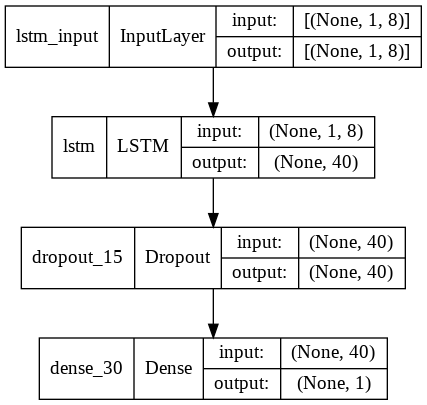

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(lstm_model_0, show_shapes=True, show_layer_names=True)

In [ ]:
y_predict_0 = lstm_model_0.predict(testX_0)
y_pred_0 = scaler_0.inverse_transform(y_predict_0)
y_target_0 = scaler_0.inverse_transform(y_test_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_0,y_pred_0)

y_predict_1 = lstm_model_1.predict(testX_1)
y_pred_1 = scaler_1.inverse_transform(y_predict_1)
y_target_1 = scaler_1.inverse_transform(y_test_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_1,y_pred_1)

y_predict_2 = lstm_model_2.predict(testX_2)
y_pred_2 = scaler_2.inverse_transform(y_predict_2)
y_target_2 = scaler_2.inverse_transform(y_test_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_2,y_pred_2)

y_predict_3 = lstm_model_3.predict(testX_3)
y_pred_3 = scaler_3.inverse_transform(y_predict_3)
y_target_3 = scaler_3.inverse_transform(y_test_3.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_3,y_pred_3)

y_predict_4 = lstm_model_4.predict(testX_4)
y_pred_4 = scaler_4.inverse_transform(y_predict_4)
y_target_4 = scaler_4.inverse_transform(y_test_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_4,y_pred_4)

print('\n\n\n*********************RESULTADOS DATA 30% TEST************************\n\n\n')

y_predict_t2_0 = lstm_model_t2_0.predict(testX_t2_0)
y_pred_t2_0 = scaler_t2_0.inverse_transform(y_predict_t2_0)
y_target_t2_0 = scaler_t2_0.inverse_transform(y_test_t2_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_t2_0,y_pred_t2_0)

y_predict_t2_1 = lstm_model_t2_1.predict(testX_t2_1)
y_pred_t2_1 = scaler_t2_1.inverse_transform(y_predict_t2_1)
y_target_t2_1 = scaler_t2_1.inverse_transform(y_test_t2_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_t2_1,y_pred_t2_1)

y_predict_t2_2 = lstm_model_t2_2.predict(testX_t2_2)
y_pred_t2_2 = scaler_t2_2.inverse_transform(y_predict_t2_2)
y_target_t2_2 = scaler_t2_2.inverse_transform(y_test_t2_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_t2_2,y_pred_t2_2)

y_predict_t2_3 = lstm_model_t2_3.predict(testX_t2_3)
y_pred_t2_3 = scaler_t2_3.inverse_transform(y_predict_t2_3)
y_target_t2_3 = scaler_t2_3.inverse_transform(y_test_t2_3.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_t2_3,y_pred_t2_3)

y_predict_t2_4 = lstm_model_t2_4.predict(testX_t2_4)
y_pred_t2_4 = scaler_t2_4.inverse_transform(y_predict_t2_4)
y_target_t2_4 = scaler_t2_4.inverse_transform(y_test_t2_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_t2_4,y_pred_t2_4)

print('\n\n\n*********************RESULTADOS CON DATA OBSERVADA************************\n\n\n')

y_predict_do_0 = lstm_model_do_0.predict(testX_do_0)
y_pred_do_0 = scaler_do_0.inverse_transform(y_predict_do_0)
y_target_do_0 = scaler_do_0.inverse_transform(y_test_do_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_do_0,y_pred_do_0)

y_predict_do_1 = lstm_model_do_1.predict(testX_do_1)
y_pred_do_1 = scaler_do_1.inverse_transform(y_predict_do_1)
y_target_do_1 = scaler_do_1.inverse_transform(y_test_do_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_do_1,y_pred_do_1)

y_predict_do_2 = lstm_model_do_2.predict(testX_do_2)
y_pred_do_2 = scaler_do_2.inverse_transform(y_predict_do_2)
y_target_do_2 = scaler_do_2.inverse_transform(y_test_do_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_do_2,y_pred_do_2)

y_predict_do_3 = lstm_model_do_3.predict(testX_do_3)
y_pred_do_3 = scaler_do_3.inverse_transform(y_predict_do_3)
y_target_do_3 = scaler_do_3.inverse_transform(y_test_do_3.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_do_3,y_pred_do_3)

y_predict_do_4 = lstm_model_do_4.predict(testX_do_4)
y_pred_do_4 = scaler_do_4.inverse_transform(y_predict_do_4)
y_target_do_4 = scaler_do_4.inverse_transform(y_test_do_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_do_4,y_pred_do_4)


Resultados Cluster 0
Mean Squared Error 7200075129671.681
Mean Absolute Error 2049149.0040045644
Root Mean Squared Error 2683295.572550978
MAPE 6.14364577523883
sMAPE 6.200139558921939
Max Error 6172268.846872084
SEP 7.552861219078555
Persistence Index 0.7821102634043458
Explained variance score 0.8568795074097496
R2 score: 0.84770524095264
E2 score: 0.84770524095264
Spearman r: 0.8979160878021674
Pearson r: 0.9257352948168781

Resultados Cluster 1
Mean Squared Error 11851228009897.482
Mean Absolute Error 3002939.3756186757
Root Mean Squared Error 3442561.257246918
MAPE 124.05126365109918
sMAPE 50.31254014480202
Max Error 7249444.446978792
SEP 44.21671929244726
Persistence Index 0.19590505972317795
Explained variance score 0.8410046066102771
R2 score: 0.6782254363470723
E2 score: 0.6782254363470723
Spearman r: 0.8796332314531815
Pearson r: 0.9177862660308838

Resultados Cluster 2
Mean Squared Error 12777544973330.736
Mean Absolute Error 2861390.8102707756
Root Mean Squared Error 357456

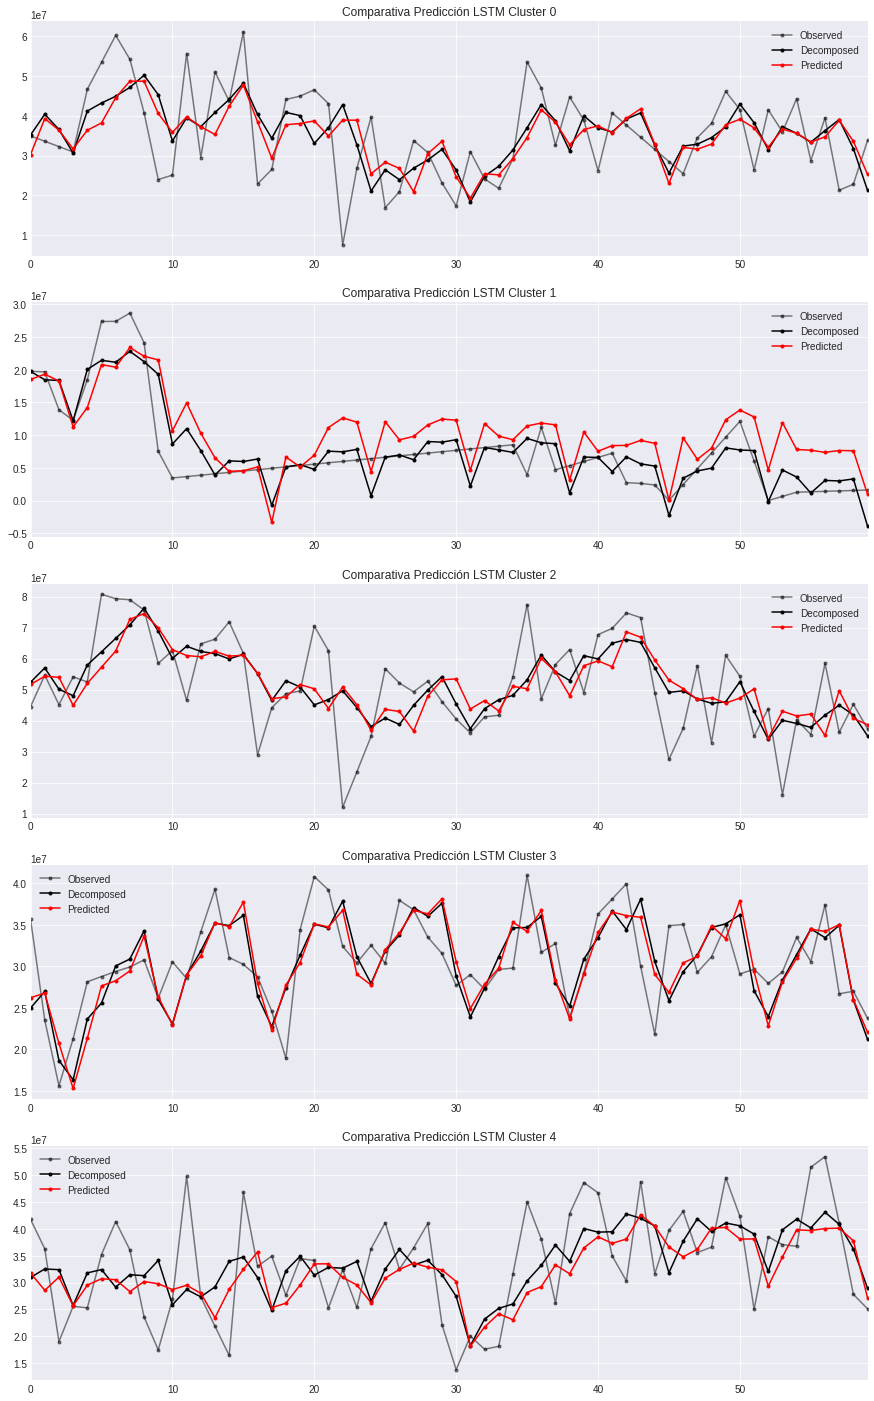

In [ ]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(resultc0.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_0,'.-k', label='Decomposed')
plt.plot(y_pred_0,'.-r', label='Predicted')
plt.title('Comparativa Predicción LSTM Cluster 0')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,2);
plt.plot(resultc1.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_1,'.-k', label='Decomposed')
plt.plot(y_pred_1,'.-r', label='Predicted')
plt.title('Comparativa Predicción LSTM Cluster 1')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,3);
plt.plot(resultc2.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_2,'.-k', label='Decomposed')
plt.plot(y_pred_2,'.-r', label='Predicted')
plt.title('Comparativa Predicción LSTM Cluster 2')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,4);
plt.plot(resultc3.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_3,'.-k', label='Decomposed')
plt.plot(y_pred_3,'.-r', label='Predicted')
plt.title('Comparativa Predicción LSTM Cluster 3')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,5);
plt.plot(resultc4.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_4,'.-k', label='Decomposed')
plt.plot(y_pred_4,'.-r', label='Predicted')
plt.title('Comparativa Predicción LSTM Cluster 4')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])



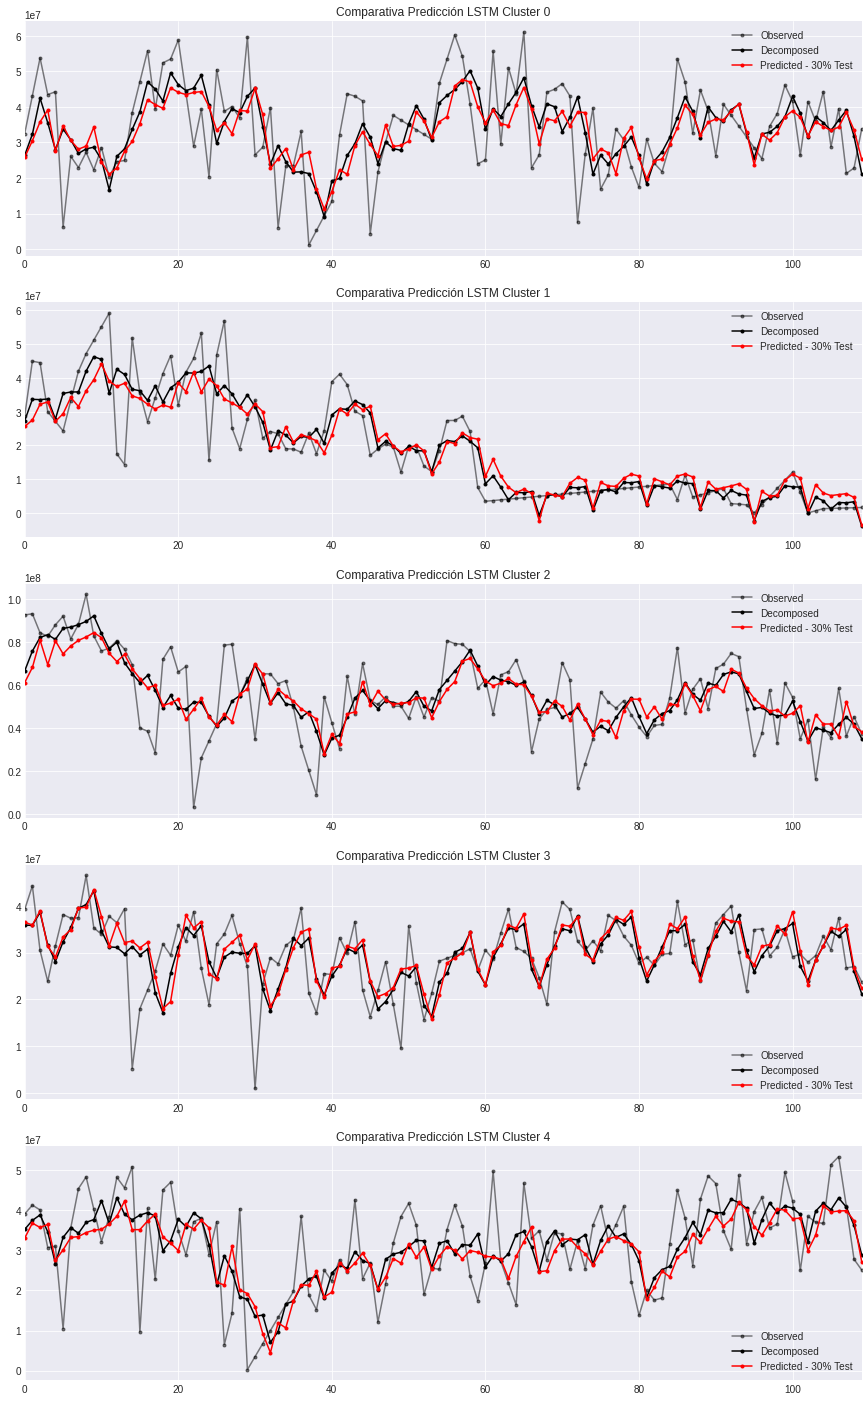

In [ ]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(resultc0.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_0,'.-k', label='Decomposed')
plt.plot(y_pred_t2_0,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 0')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,2);
plt.plot(resultc1.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_1,'.-k', label='Decomposed')
plt.plot(y_pred_t2_1,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 1')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,3);
plt.plot(resultc2.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_2,'.-k', label='Decomposed')
plt.plot(y_pred_t2_2,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 2')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,4);
plt.plot(resultc3.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_3,'.-k', label='Decomposed')
plt.plot(y_pred_t2_3,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 3')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,5);
plt.plot(resultc4.observed[-117:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_t2_4,'.-k', label='Decomposed')
plt.plot(y_pred_t2_4,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 4')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

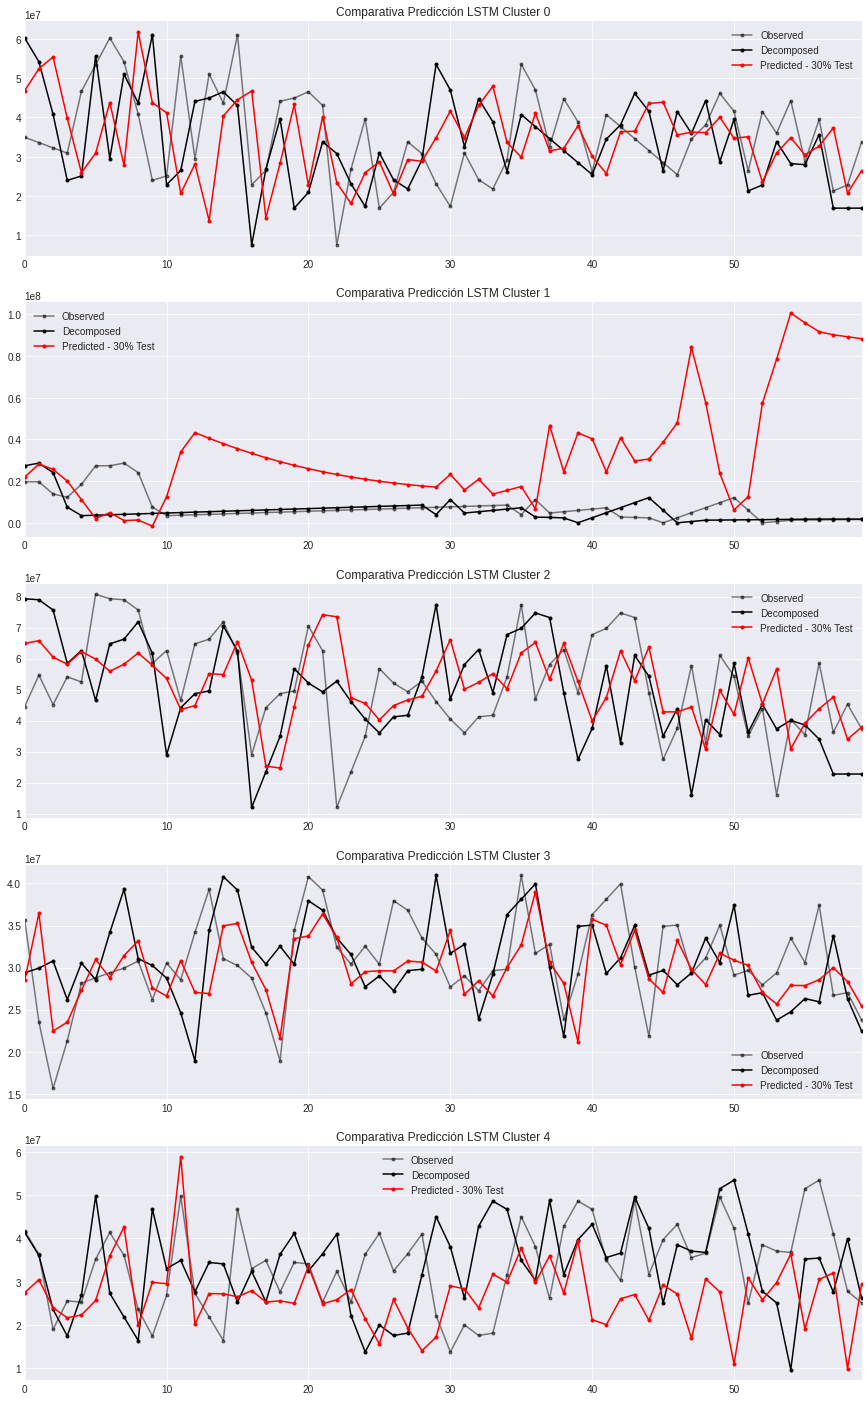

In [ ]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(resultc0.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_0,'.-k', label='Decomposed')
plt.plot(y_pred_do_0,'.-r', label='Predicted - Data Observada')
plt.title('Comparativa Predicción LSTM Cluster 0')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,2);
plt.plot(resultc1.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_1,'.-k', label='Decomposed')
plt.plot(y_pred_do_1,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 1')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,3);
plt.plot(resultc2.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_2,'.-k', label='Decomposed')
plt.plot(y_pred_do_2,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 2')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,4);
plt.plot(resultc3.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_3,'.-k', label='Decomposed')
plt.plot(y_pred_do_3,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 3')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])

plt.subplot(5,1,5);
plt.plot(resultc4.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_do_4,'.-k', label='Decomposed')
plt.plot(y_pred_do_4,'.-r', label='Predicted - 30% Test')
plt.title('Comparativa Predicción LSTM Cluster 4')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted - 30% Test'])


In [ ]:
#plt.plot(y_target, y_pred,'.')

In [ ]:
#y_predict = lstm_model.predict(testX[0,:,:])


In [ ]:
#testX[0,:,:]

#8. Random Forest

In [36]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(RandomForestRegressor(n_estimators=100, max_features=1, oob_score=True))

fit_0 = rfe.fit(X_train_0, y_train_0)
fit_1 = rfe.fit(X_train_1, y_train_1)
fit_2 = rfe.fit(X_train_2, y_train_2)
fit_3 = rfe.fit(X_train_3, y_train_3)
fit_4 = rfe.fit(X_train_4, y_train_4)

fit_t2_0 = rfe.fit(X_train_t2_0, y_train_t2_0)
fit_t2_1 = rfe.fit(X_train_t2_1, y_train_t2_1)
fit_t2_2 = rfe.fit(X_train_t2_2, y_train_t2_2)
fit_t2_3 = rfe.fit(X_train_t2_3, y_train_t2_3)
fit_t2_4 = rfe.fit(X_train_t2_4, y_train_t2_4)


fit_do_0 = rfe.fit(X_train_do_0, y_train_do_0)
fit_do_1 = rfe.fit(X_train_do_1, y_train_do_1)
fit_do_2 = rfe.fit(X_train_do_2, y_train_do_2)
fit_do_3 = rfe.fit(X_train_do_3, y_train_do_3)
fit_do_4 = rfe.fit(X_train_do_4, y_train_do_4)


In [38]:
y_predict_0 = fit_0.predict(X_test_0)
y_pred_0 = scaler_0.inverse_transform(y_predict_0.reshape(-1,1))
y_target_0 = scaler_0.inverse_transform(y_test_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_0,y_pred_0)

y_predict_1 = fit_1.predict(X_test_1)
y_pred_1 = scaler_0.inverse_transform(y_predict_1.reshape(-1,1))
y_target_1 = scaler_0.inverse_transform(y_test_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_1,y_pred_1)

y_predict_2 = fit_2.predict(X_test_2)
y_pred_2 = scaler_0.inverse_transform(y_predict_2.reshape(-1,1))
y_target_2 = scaler_0.inverse_transform(y_test_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_2,y_pred_2)

y_predict_3 = fit_3.predict(X_test_3)
y_pred_3 = scaler_0.inverse_transform(y_predict_3.reshape(-1,1))
y_target_3 = scaler_0.inverse_transform(y_test_3.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_3,y_pred_3)

y_predict_4 = fit_4.predict(X_test_4)
y_pred_4 = scaler_0.inverse_transform(y_predict_4.reshape(-1,1))
y_target_4 = scaler_0.inverse_transform(y_test_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_4,y_pred_4)


print('\n\n\n*********************RESULTADOS DATA 30% TEST************************\n\n\n')

y_predict_t2_0 = fit_t2_0.predict(X_test_t2_0)
y_pred_t2_0 = scaler_t2_0.inverse_transform(y_predict_t2_0.reshape(-1,1))
y_target_t2_0 = scaler_t2_0.inverse_transform(y_test_t2_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_t2_0,y_pred_t2_0)

y_predict_t2_1 = fit_t2_1.predict(X_test_t2_1)
y_pred_t2_1 = scaler_t2_1.inverse_transform(y_predict_t2_1.reshape(-1,1))
y_target_t2_1 = scaler_t2_1.inverse_transform(y_test_t2_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_t2_1,y_pred_t2_1)

y_predict_t2_2 = fit_t2_2.predict(X_test_t2_2)
y_pred_t2_2 = scaler_t2_0.inverse_transform(y_predict_t2_2.reshape(-1,1))
y_target_t2_2 = scaler_t2_0.inverse_transform(y_test_t2_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_t2_2,y_pred_t2_2)

y_predict_t2_3 = fit_t2_3.predict(X_test_t2_3)
y_pred_t2_3 = scaler_t2_0.inverse_transform(y_predict_4.reshape(-1,1))
y_target_t2_3 = scaler_t2_0.inverse_transform(y_test_4.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_t2_3,y_pred_t2_3)

y_predict_t2_4 = fit_t2_4.predict(X_test_t2_4)
y_pred_t2_4 = scaler_t2_0.inverse_transform(y_predict_t2_4.reshape(-1,1))
y_target_t2_4 = scaler_t2_0.inverse_transform(y_test_t2_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_t2_4,y_pred_t2_4)


print('\n\n\n*********************RESULTADOS CON DATA OBSERVADA************************\n\n\n')


y_predict_do_0 = fit_do_0.predict(X_test_do_0)
y_pred_do_0 = scaler_do_0.inverse_transform(y_predict_do_0.reshape(-1,1))
y_target_do_0 = scaler_do_0.inverse_transform(y_test_do_0.reshape(-1,1))
print('Resultados Cluster 0')
performance_results(y_target_do_0,y_pred_do_0)

y_predict_do_1 = fit_do_1.predict(X_test_do_1)
y_pred_do_1 = scaler_do_1.inverse_transform(y_predict_do_1.reshape(-1,1))
y_target_do_1 = scaler_do_1.inverse_transform(y_test_do_1.reshape(-1,1))
print('\nResultados Cluster 1')
performance_results(y_target_do_1,y_pred_do_1)

y_predict_do_2 = fit_do_2.predict(X_test_do_2)
y_pred_do_2 = scaler_do_0.inverse_transform(y_predict_do_2.reshape(-1,1))
y_target_do_2 = scaler_do_0.inverse_transform(y_test_do_2.reshape(-1,1))
print('\nResultados Cluster 2')
performance_results(y_target_do_2,y_pred_do_2)

y_predict_do_3 = fit_do_3.predict(X_test_do_3)
y_pred_do_3 = scaler_do_0.inverse_transform(y_predict_4.reshape(-1,1))
y_target_do_3 = scaler_do_0.inverse_transform(y_test_4.reshape(-1,1))
print('\nResultados Cluster 3')
performance_results(y_target_do_3,y_pred_do_3)

y_predict_do_4 = fit_do_4.predict(X_test_do_4)
y_pred_do_4 = scaler_do_0.inverse_transform(y_predict_do_4.reshape(-1,1))
y_target_do_4 = scaler_do_0.inverse_transform(y_test_do_4.reshape(-1,1))
print('\nResultados Cluster 4')
performance_results(y_target_do_4,y_pred_do_4)

Resultados Cluster 0
Mean Squared Error 82071679679045.66
Mean Absolute Error 7296477.982982276
Root Mean Squared Error 9059342.121757278
MAPE 19.92905962545743
sMAPE 22.29829945773768
Max Error 24714276.00742284
SEP 25.499968949278113
Persistence Index -1.56258012802627
Explained variance score -0.0636039420606398
R2 score: -0.7359661470507908
E2 score: -0.7359661470507908
Spearman r: 0.24767991108641293
Pearson r: 0.2969651586342279

Resultados Cluster 1
Mean Squared Error 24578001309349.613
Mean Absolute Error 3939841.310044595
Root Mean Squared Error 4957620.528978555
MAPE 47.14860614111364
sMAPE 29.246861791958235
Max Error 11772588.380355958
SEP 34.73938479803985
Persistence Index -0.45854374575035295
Explained variance score 0.47109504628220766
R2 score: 0.4156582482360123
E2 score: 0.4156582482360123
Spearman r: 0.6440122256182274
Pearson r: 0.6873035662447141

Resultados Cluster 2
Mean Squared Error 30049677617876.88
Mean Absolute Error 4288769.674436607
Root Mean Squared Erro

Text(0.5, 1.0, 'Vector de disperción Random Forest Cluster 4')

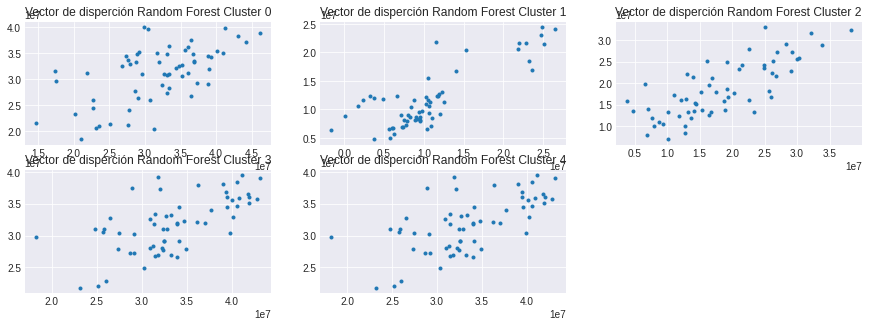

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(2,3,1);
plt.plot(y_target_0,y_pred_0,'.')
plt.title('Vector de disperción Random Forest Cluster 0')

plt.subplot(2,3,2);
plt.plot(y_target_1,y_pred_1,'.')
plt.title('Vector de disperción Random Forest Cluster 1')

plt.subplot(2,3,3);
plt.plot(y_target_2,y_pred_2,'.')
plt.title('Vector de disperción Random Forest Cluster 2')

plt.subplot(2,3,4);
plt.plot(y_target_3,y_pred_3,'.')
plt.title('Vector de disperción Random Forest Cluster 3')

plt.subplot(2,3,5);
plt.plot(y_target_4,y_pred_4,'.')
plt.title('Vector de disperción Random Forest Cluster 4')




In [40]:
fit_0.get_params()

{'estimator': RandomForestRegressor(max_features=1, oob_score=True),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': True,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'importance_getter': 'auto',
 'n_features_to_select': None,
 'step': 1,
 'verbose': 0}

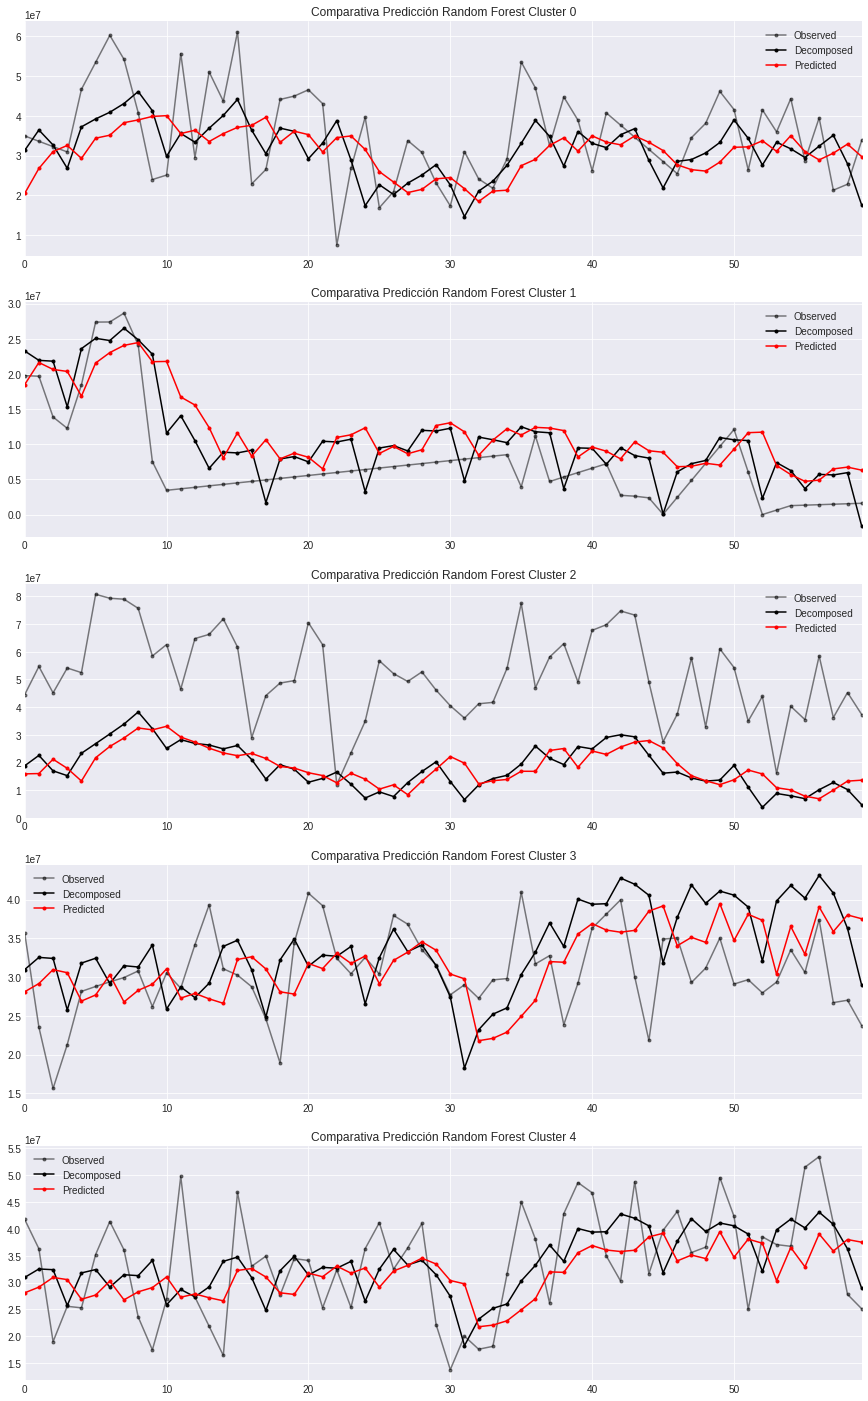

In [ ]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1);
plt.plot(resultc0.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_0,'.-k',label='Decomposed')
plt.plot(y_pred_0,'.-r', label='Predicted')
plt.title('Comparativa Predicción Random Forest Cluster 0')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,2);
plt.plot(resultc1.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_1,'.-k',label='Decomposed')
plt.plot(y_pred_1,'.-r', label='Predicted')
plt.title('Comparativa Predicción Random Forest Cluster 1')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,3);
plt.plot(resultc2.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_2,'.-k',label='Decomposed')
plt.plot(y_pred_2,'.-r', label='Predicted')
plt.title('Comparativa Predicción Random Forest Cluster 2')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,4);
plt.plot(resultc3.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_3,'.-k',label='Decomposed')
plt.plot(y_pred_3,'.-r', label='Predicted')
plt.title('Comparativa Predicción Random Forest Cluster 3')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])

plt.subplot(5,1,5);
plt.plot(resultc4.observed[-67:-7],'.-k', alpha=0.5, label='Observed')
plt.plot(y_target_4,'.-k',label='Decomposed')
plt.plot(y_pred_4,'.-r', label='Predicted')
plt.title('Comparativa Predicción Random Forest Cluster 4')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(['Observed', 'Decomposed', 'Predicted'])


